### Expt Number : 2
#### Title : Perform Morphological Operations on images and Edge Detection
PRN number : 1032211734
#### Name : Nishad Jagtap
Div : A               
Batch : A4
#### Date of performance : 17/01/2024

#### Erosion  (Contraction)
Erosion of set A  by structuring element B  is set of all points z such that B translated by z, is contained in A

#### Dilation (Expansion)
Dilation is s et of all displace ments of z such that foreground elements of B overlap atleast one element of A

#### Opening
Opening is erosion followed by dilation

#### Closing
Closing is dilation followed by erosion

Opening and closing is  used in Fingeprint Application

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

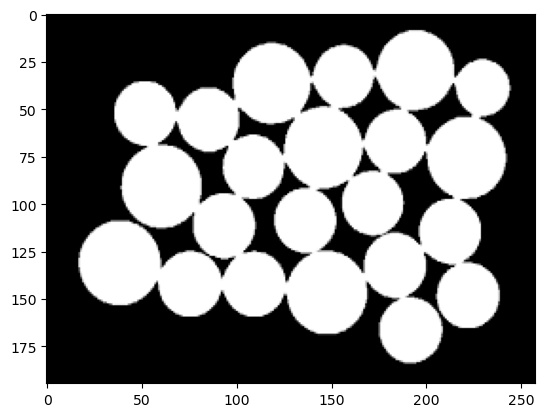

In [3]:
img = cv2.imread("images.png")
plt.subplot(1,1,1)
plt.imshow(img)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


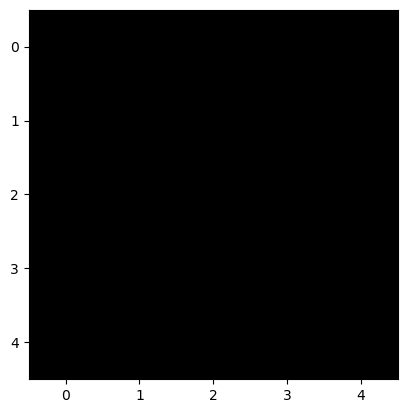

In [4]:
kernel = np.zeros((5,5),np.uint8)
print(kernel)
#'''
for i in range(len(kernel)):
    for j in range(1,len(kernel[0]),2):
        kernel[i][j] = 0
#        '''
        
        
'''for i in range(len(kernel)):
    if kernel[i] ==False:
        kernel[i]=innt8(0)
    if kernel[i] ==True:
        kernel[i]=uint8(1)'''

#print(kernel)
plt.imshow(kernel,cmap = 'gray');

In [5]:
erode = cv2.erode(img,kernel,iterations = 2)
dilate = cv2.dilate(img, kernel, iterations=1)

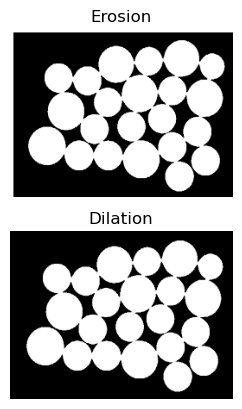

In [6]:
plt.subplot(2,1,1)
plt.imshow(erode);
plt.title('Erosion')
plt.axis('off');

plt.subplot(2,1,2)
plt.imshow(dilate);
plt.title('Dilation')
plt.axis('off');

In [7]:
open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations=3)
close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel,iterations=1)

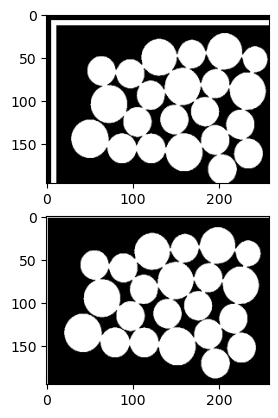

In [8]:
plt.subplot(2,1,1)
plt.imshow(open)

plt.subplot(2,1,2)
plt.imshow(close)

## Part 2 : Fingerprint

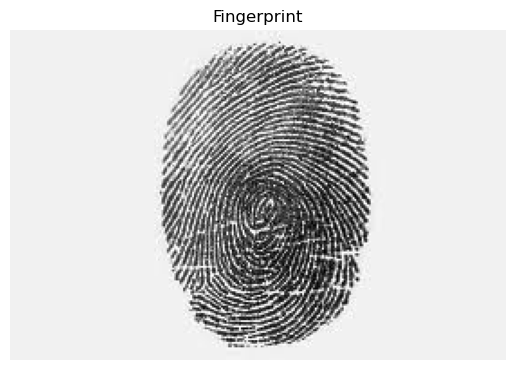

In [9]:
f = abs(255-cv2.imread('fprint.png',cv2.IMREAD_GRAYSCALE));
plt.subplot(1,1,1)
plt.axis('off')
plt.title('Fingerprint')
plt.imshow(f,cmap='gray');

In [10]:
import random
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    row, col= image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255)
    noisy = noisy.astype(np.uint8)
    return noisy
#gauss_image = add_gaussian_noise(gray_image, mean=0, sigma=25)

def add_s_and_p_noise(img): 
    row , col = img.shape 
    y=img.copy()
        
    # Randomly pick some pixels in the 
    # image for coloring them white 
    # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300, 10000) 
    for i in range(number_of_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to white 
        y[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in 
    # the image for coloring them black 
    # Pick a random number between 300 and 10000 
    number_of_pixels = random.randint(300 , 10000) 
    for i in range(number_of_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to black 
        y[y_coord][x_coord] = 0
          
    return y

In [11]:
f = add_s_and_p_noise(f);

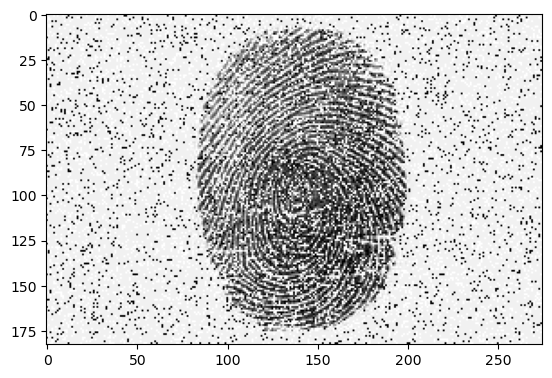

In [12]:
plt.imshow(f,cmap='gray');

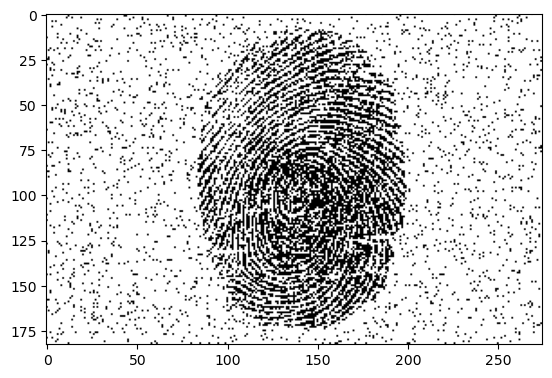

In [13]:
#thresholding
(thresh, f) = cv2.threshold(f, 110, 200, cv2.THRESH_BINARY)
plt.imshow(f,cmap='gray')

In [14]:
kern = np.array([[ 0 ,1  ,0 ],
        [1   ,1  ,1 ],
        [ 0  ,1  ,0 ]],np.uint8)
print(kern)
#plt.imshow('kern');

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [15]:
f_er = cv2.erode(f,kernel,iterations = 1)
f_dil = cv2.dilate(f, kernel, iterations=3)

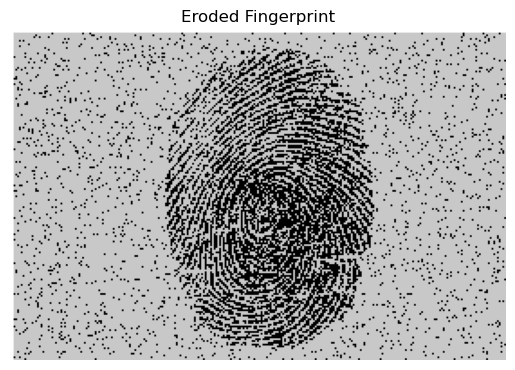

In [16]:
plt.subplot(1,1,1)
plt.axis('off')
plt.title('Eroded Fingerprint')
plt.imshow(f_er,cmap='gray');

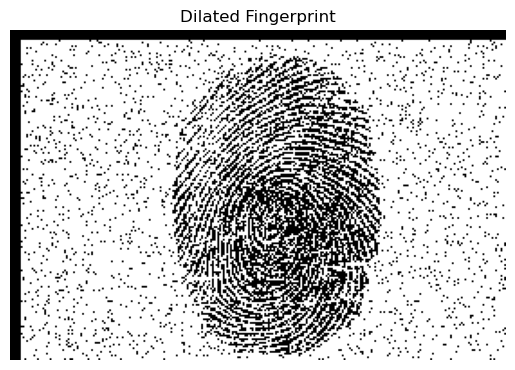

In [17]:
plt.subplot(1,1,1)
plt.axis('off')
plt.title('Dilated Fingerprint')
plt.imshow(f_dil,cmap='gray');

In [18]:
f_op = cv2.morphologyEx(f, cv2.MORPH_OPEN, kernel,iterations=3)
f_cl = cv2.morphologyEx(f, cv2.MORPH_CLOSE, kernel,iterations=3)

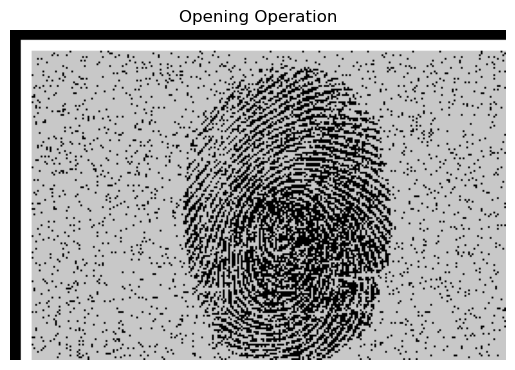

In [19]:
plt.subplot(1,1,1)
plt.axis('off')
plt.title('Opening Operation')
plt.imshow(f_op,cmap='gray');

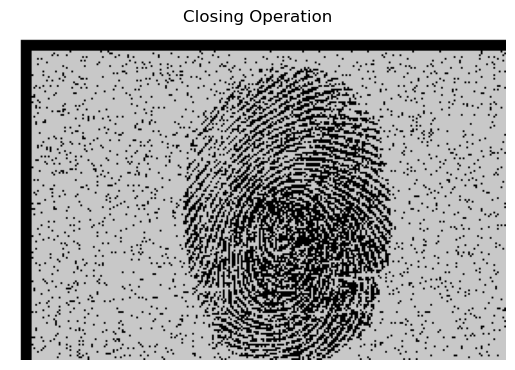

In [20]:
plt.subplot(1,1,1)
plt.axis('off')
plt.title('Closing Operation')
plt.imshow(f_cl,cmap='gray');

## Part 3 : image gradient and edging

In [21]:
pcb=cv2.imread('pcb.jpeg',cv2.IMREAD_GRAYSCALE)

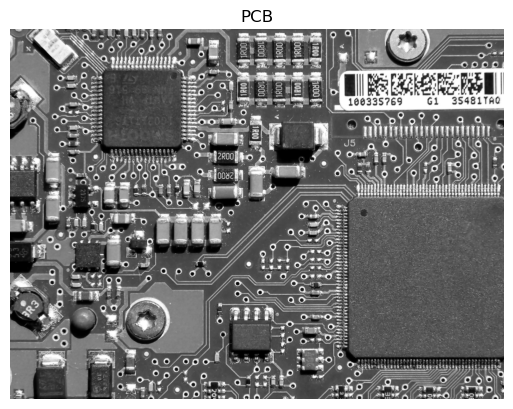

In [22]:
plt.subplot(1,1,1)
plt.axis('off')
plt.title('PCB')
plt.imshow(pcb,cmap='gray');

In [263]:
ker = np.ones((3,3),np.uint8)
er = cv2.erode(pcb,ker,iterations=2)
dil = cv2.dilate(pcb,ker,iterations=2)

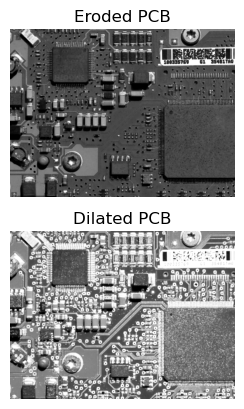

In [264]:
plt.subplot(2,1,1)
plt.axis('off')
plt.title('Eroded PCB')
plt.imshow(er,cmap='gray');

plt.subplot(2,1,2)
plt.axis('off')
plt.title('Dilated PCB')
plt.imshow(dil,cmap='gray');

In [265]:
gradient = cv2.subtract(dil,er)

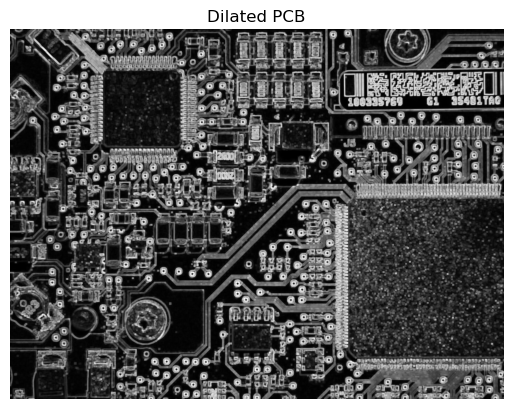

In [266]:
plt.subplot(1,1,1)
plt.axis('off')
plt.title('Dilated PCB')
plt.imshow(gradient,cmap='gray');